In [1]:
##Coded by Yuan 'Rab0na' Gao, a huge fan of Mike 'Shroud' Grzsiek.
##This project scraped all the statistics of Shroud's DuoFPP game in PUBG, and analysis the pattern discovered inside.
##
import numpy as np
from datascience import *
import requests
import json
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Safari/605.1.15'}
offset = 'eyJfaWQiOiI1YmE0MDI0NjA0ZTU2YjAwMDFkMWMwMjAiLCJzdGFydGVkX2F0IjoxNTM3NDczMTYwLCJzZWFzb24iOiIyMDE4LTA5In0='
stat_api = 'https://pubg.op.gg/api/users/59fe237a6e6f210001da80f9/matches/recent?queue_size=2&mode=fpp&after='+ offset.replace('=','') + '%3D'
response_stat = requests.get(stat_api, headers = headers)
json_stat = response_stat.text
json_stat = json.loads(json_stat)

In [4]:
def get_sta (offset):
    stat_api = 'https://pubg.op.gg/api/users/59fe237a6e6f210001da80f9/matches/recent?queue_size=2&mode=fpp&after='+ offset.replace('=','') + '%3D'
    response_stat = requests.get(stat_api, headers = headers)
    json_stat = response_stat.text
    json_stat = json.loads(json_stat)
    df = pd.DataFrame(columns=['offset', 'match_id', 'started_date', 'total_rank', 'rank', 'kills', 'assists', 'heals', 'weapon_acquired', 'boosts', 'deathtype', 'time_survived', 'longest_kill', 'headshot_kills', 'walk_distance', 'ride_distance', 'damage', 'knock_downs', 'revives'])
    for i in range(0,19):
        offset = json_stat['matches']['items'][i]['offset']
        match_id = json_stat['matches']['items'][i]['match_id']
        started_date = json_stat['matches']['items'][i]['started_at'][:10]
        total_rank = json_stat['matches']['items'][i]['total_rank']
        rank = json_stat['matches']['items'][i]['participant']['stats']['rank']
        kills = json_stat['matches']['items'][i]['participant']['stats']['combat']['kda']['kills']
        assists = json_stat['matches']['items'][i]['participant']['stats']['combat']['kda']['assists']
        heals = json_stat['matches']['items'][i]['participant']['stats']['combat']['heals']
        weapon_acquired = json_stat['matches']['items'][i]['participant']['stats']['combat']['weapon_acquired']
        boosts = json_stat['matches']['items'][i]['participant']['stats']['combat']['boosts']
        deathtype = json_stat['matches']['items'][i]['participant']['stats']['combat']['death_type']
        time_survived = json_stat['matches']['items'][i]['participant']['stats']['combat']['time_survived']
        longest_kill = json_stat['matches']['items'][i]['participant']['stats']['combat']['kda']['longest_kill']
        headshot_kills = json_stat['matches']['items'][i]['participant']['stats']['combat']['kda']['headshot_kills']
        walk_distance = json_stat['matches']['items'][i]['participant']['stats']['combat']['distance_traveled']['walk_distance']
        ride_distance = json_stat['matches']['items'][i]['participant']['stats']['combat']['distance_traveled']['ride_distance']
        damage = json_stat['matches']['items'][i]['participant']['stats']['combat']['damage']['damage_dealt']
        knock_downs = json_stat['matches']['items'][i]['participant']['stats']['combat']['dbno']['knock_downs']
        revives = json_stat['matches']['items'][i]['participant']['stats']['combat']['dbno']['revives']
        data = [[offset, match_id, started_date, total_rank, rank, kills, assists, heals, weapon_acquired, boosts, deathtype, time_survived, longest_kill, headshot_kills, walk_distance, ride_distance, damage, knock_downs, revives]]
        df1 = pd.DataFrame(data, columns=['offset', 'match_id', 'started_date', 'total_rank', 'rank', 'kills', 'assists', 'heals', 'weapon_acquired', 'boosts', 'deathtype', 'time_survived', 'longest_kill', 'headshot_kills', 'walk_distance', 'ride_distance', 'damage', 'knock_downs', 'revives'])
        df = df.append(df1)
    return df

In [5]:
def get_offset(prioroffset):
    stat_api = 'https://pubg.op.gg/api/users/59fe237a6e6f210001da80f9/matches/recent?queue_size=2&mode=fpp&after='+ prioroffset.replace('=','') + '%3D'
    response_stat = requests.get(stat_api, headers = headers)
    json_stat = response_stat.text
    json_stat = json.loads(json_stat)
    i = len(json_stat['matches']['items'])
    return json_stat['matches']['items'][i-1]['offset']
offsetlist = []
offsetlist.append(get_offset('eyJfaWQiOiI1YmExN2YzM2YxNDIzMTAwMDE1ODcxYjIiLCJzdGFydGVkX2F0IjoxNTM3MzA4OTQ1LCJzZWFzb24iOiIyMDE4LTA5In0='))
for i in range (80):
    offsetlist.append(get_offset(offsetlist[-1]))  
offsetlist

['eyJfaWQiOiI1YjdmMjBhOGFjNjQ1NTAwMDFiMTdjOTgiLCJzdGFydGVkX2F0IjoxNTM1MDU2MTEzLCJzZWFzb24iOiIyMDE4LTA4In0=',
 'eyJfaWQiOiI1Yjc5ZjdkNzJlN2RjNzAwMDE1ZTRkYTgiLCJzdGFydGVkX2F0IjoxNTM0NzE4NjA4LCJzZWFzb24iOiIyMDE4LTA4In0=',
 'eyJfaWQiOiI1Yjc0Y2Y5ZGFlMWRlMjAwMDEzZjgyMmIiLCJzdGFydGVkX2F0IjoxNTM0MzgwNTE3LCJzZWFzb24iOiIyMDE4LTA4In0=',
 'eyJfaWQiOiI1Yjc0YWU5M2UwYWZiOTAwMDE5Yzg1N2EiLCJzdGFydGVkX2F0IjoxNTM0MzcyMTQ5LCJzZWFzb24iOiIyMDE4LTA4In0=',
 'eyJfaWQiOiI1YjZiOWE1Nzk3YWY2OTAwMDFhZTk5MTMiLCJzdGFydGVkX2F0IjoxNTMzNzc3MDQ5LCJzZWFzb24iOiIyMDE4LTA4In0=',
 'eyJfaWQiOiI1YjQzYzhkMmM4NGUyMTAwMDFkNmM2YWUiLCJzdGFydGVkX2F0IjoxNTMxMTY3NTMzLCJzZWFzb24iOiIyMDE4LTA3In0=',
 'eyJfaWQiOiI1YjNlYTQ4ZDAyOTQxNDAwMDFhMmYzZDkiLCJzdGFydGVkX2F0IjoxNTMwODMwNTUzLCJzZWFzb24iOiIyMDE4LTA3In0=',
 'eyJfaWQiOiI1YjM4Mjg4OTBkYTZiMzAwMDFlOTViNjQiLCJzdGFydGVkX2F0IjoxNTMwNDA1MTUwLCJzZWFzb24iOiIyMDE4LTA2In0=',
 'eyJfaWQiOiI1YjM2OWM1MWRhZDYwZTAwMDFkZDYxZDYiLCJzdGFydGVkX2F0IjoxNTMwMzAzNzIxLCJzZWFzb24iOiIyMDE4LTA2In0=',
 'eyJfaWQiOiI1YjM0M

In [92]:
shrouddf = pd.DataFrame(columns=['offset', 'match_id', 'started_date', 'total_rank', 'rank', 'kills', 'assists', 'heals', 'weapon_acquired', 'boosts', 'deathtype', 'time_survived', 'longest_kill', 'headshot_kills', 'walk_distance', 'ride_distance', 'damage', 'knock_downs', 'revives'])
for offset in offsetlist:
    shrouddf = shrouddf.append(get_sta(offset))
shrouddf

,offset,match_id,started_date,total_rank,rank,kills,assists,heals,weapon_acquired,boosts,deathtype,time_survived,longest_kill,headshot_kills,walk_distance,ride_distance,damage,knock_downs,revives
0,eyJfaWQiOiI1YjdmMjAzYzc3NzU1YzAwMDEyYTdkOGIiLC...,Svg7Thpx__N3LAxphvieh4VE41crFYe8pvKPSjlIEQQuD3...,2018-08-23,48,47,2,0,0,1,0,byplayer,310.54,23.2695,0,44.9269,0,200,1,0
0,eyJfaWQiOiI1YjdmMWYwN2E3NzdlYzAwMDFjYjkxYWYiLC...,Svg7Thpx__N3LAxphviehx-y3K9soMduq4zrrkV8gE_X8N...,2018-08-23,50,50,0,0,0,0,0,byplayer,146.957,0,0,0,0,0,0,0
0,eyJfaWQiOiI1YjdmMWMzMDQ0MDE3OTAwMDFhNDgxY2YiLC...,Svg7Thpx__N3LAxphvieh4ogT3zxuJyZomFxGgq7nmzg8u...,2018-08-23,48,47,0,0,0,2,0,byplayer,99.509,0,0,51.0667,0,228,1,0
0,eyJfaWQiOiI1YjdmMWViYzA2ZDI5ODAwMDFhM2Y2MTMiLC...,Svg7Thpx__N3LAxphviehzdhIj_-_twlgO0zFwZZFmeaU5...,2018-08-23,49,49,0,0,0,1,0,byplayer,97.906,0,0,20.8518,0,101,0,0
0,eyJfaWQiOiI1YjdmMWE4ZWJjNzU5MTAwMDFkZDI4NGEiLC...,Svg7Thpx__N3LAxphvieh_qdvPG2JgLPnzHFp4sZ_RZpnh...,2018-08-23,50,40,0,0,0,2,0,byplayer,173.172,0,0,79.6697,0,194,1,0
0,eyJfaWQiOiI1YjdmMWI0OTA2ZDI5ODAwMDFlZThjOTAiLC...,Svg7Thpx__N3LAxphvieh1oKFPapvcBFveTxpWHB_e7D4T...,2018-08-23,47,37,3,0,0,3,0,byplayer,324.687,63.2126,2,324.975,0,300,2,0
0,eyJfaWQiOiI1YjdhMTVhNGI4MTkxMzAwMDE5MTk0ZTQiLC...,Svg7Thpx__N3LAxphvieh30eu97RXb_mx8ETK1MAHhY_gJ...,2018-08-20,49,1,2,3,4,3,6,byplayer,1233.97,2.21431,0,2703.61,0,466,2,0
0,eyJfaWQiOiI1YjdhMTI4ODllOWUxNDAwMDFkZDFjNGMiLC...,Svg7Thpx__N3LAxphvieh86m7hb2zIum-k5LbQFSaWX9Us...,2018-08-20,49,18,9,3,0,5,2,byplayer,585.309,215.352,3,912.081,0,840,4,1
0,eyJfaWQiOiI1YjdhMGYyZjQzMmMxMDAwMDFmNDcxZTQiLC...,Svg7Thpx__N3LAxphviehzHaqsNsiLD_NqdxSJ-ZWeHalh...,2018-08-20,49,16,9,0,4,3,5,byplayer,710.839,69.2112,1,1163.89,0,1064,4,0
0,eyJfaWQiOiI1YjdhMDliMzA1NjQzYjAwMDExN2JmMzYiLC...,Svg7Thpx__N3LAxphviehxULzrAQFtpD-Ez2ax1JSLI6qX...,2018-08-19,49,1,10,2,0,3,5,alive,1266.28,211.657,1,3932.8,0,1007,5,0


In [8]:
shroudcsv = shrouddf.to_csv('shroud_stat.csv', index=False)

In [95]:
shrouddf['kills'] = shrouddf['kills'].dropna()
shrouddf['rank'] = shrouddf['rank'].dropna()
shrouddf.head()

,offset,match_id,started_date,total_rank,rank,kills,assists,heals,weapon_acquired,boosts,deathtype,time_survived,longest_kill,headshot_kills,walk_distance,ride_distance,damage,knock_downs,revives
0,eyJfaWQiOiI1YjdmMjAzYzc3NzU1YzAwMDEyYTdkOGIiLC...,Svg7Thpx__N3LAxphvieh4VE41crFYe8pvKPSjlIEQQuD3...,2018-08-23,48,47,2,0,0,1,0,byplayer,310.54,23.2695,0,44.9269,0,200,1,0
0,eyJfaWQiOiI1YjdmMWYwN2E3NzdlYzAwMDFjYjkxYWYiLC...,Svg7Thpx__N3LAxphviehx-y3K9soMduq4zrrkV8gE_X8N...,2018-08-23,50,50,0,0,0,0,0,byplayer,146.957,0,0,0,0,0,0,0
0,eyJfaWQiOiI1YjdmMWMzMDQ0MDE3OTAwMDFhNDgxY2YiLC...,Svg7Thpx__N3LAxphvieh4ogT3zxuJyZomFxGgq7nmzg8u...,2018-08-23,48,47,0,0,0,2,0,byplayer,99.509,0,0,51.0667,0,228,1,0
0,eyJfaWQiOiI1YjdmMWViYzA2ZDI5ODAwMDFhM2Y2MTMiLC...,Svg7Thpx__N3LAxphviehzdhIj_-_twlgO0zFwZZFmeaU5...,2018-08-23,49,49,0,0,0,1,0,byplayer,97.906,0,0,20.8518,0,101,0,0
0,eyJfaWQiOiI1YjdmMWE4ZWJjNzU5MTAwMDFkZDI4NGEiLC...,Svg7Thpx__N3LAxphvieh_qdvPG2JgLPnzHFp4sZ_RZpnh...,2018-08-23,50,40,0,0,0,2,0,byplayer,173.172,0,0,79.6697,0,194,1,0


In [96]:
shrouddf['started_date']= pd.to_datetime(shrouddf.started_date, format='%Y-%m-%d')
shrouddf.started_date.iloc[0]

Timestamp('2018-08-23 00:00:00')

In [97]:
shrouddf['rank'] = shrouddf['rank'].astype('int')
shrouddf['kills'] = shrouddf['kills'].astype('int')
shrouddf['headshot_kills'] = shrouddf['headshot_kills'].astype('int')

In [98]:
shrouddf.started_date.sort_values().unique()[:10]

array(['2017-12-22T00:00:00.000000000', '2017-12-28T00:00:00.000000000',
       '2017-12-29T00:00:00.000000000', '2017-12-30T00:00:00.000000000',
       '2017-12-31T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2018-01-02T00:00:00.000000000', '2018-01-03T00:00:00.000000000',
       '2018-01-04T00:00:00.000000000', '2018-01-05T00:00:00.000000000'],
      dtype='datetime64[ns]')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


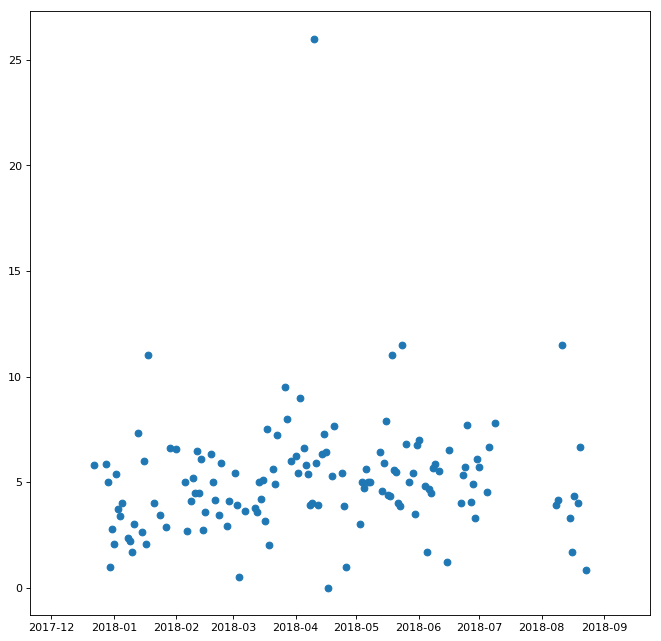

In [99]:
shroudkillgrouped = shrouddf.set_index('started_date').groupby(pd.TimeGrouper('d'))['kills'].mean()
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(shroudkillgrouped.index, shroudkillgrouped)

In [100]:
shroud26=shrouddf.loc[shrouddf['started_date']=='2018-04-10T00:00:00.000000000']
shroud26

,offset,match_id,started_date,total_rank,rank,kills,assists,heals,weapon_acquired,boosts,deathtype,time_survived,longest_kill,headshot_kills,walk_distance,ride_distance,damage,knock_downs,revives
0,eyJfaWQiOiI1YWNkMTc3MGU5NmRhMDAwMDEzYjJjZWUiLC...,Svg7Thpx__N3LAxphvieh5UyN4CnYreshEmXKNPZ0tFitA...,2018-04-10,49,1,26,2,11,6,9,alive,1891.81,213.171,8,4379.58,0,2720,10,2


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


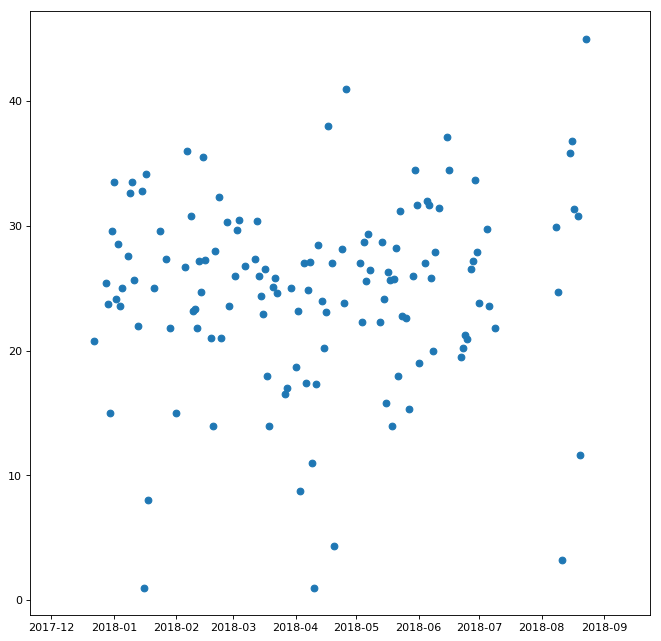

In [52]:
shroudrankgrouped = shrouddf.set_index('started_date').groupby(pd.TimeGrouper('d'))['rank'].mean()##.plot(kind='scatter',figsize=(20,12))
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(shroudrankgrouped.index, shroudrankgrouped)

In [101]:
shroudsuiside=shrouddf.loc[shrouddf['deathtype']=='suicide']
shroudsuiside.sort_values('kills', ascending=False).head()

,offset,match_id,started_date,total_rank,rank,kills,assists,heals,weapon_acquired,boosts,deathtype,time_survived,longest_kill,headshot_kills,walk_distance,ride_distance,damage,knock_downs,revives
0,eyJfaWQiOiI1YjEwNWE0Yzk0N2E0ZTAwMDE5MWFkMzMiLC...,Svg7Thpx__N3LAxphvieh5LAth95rW0YtlgJaSH24zEYvV...,2018-05-31,47,14,24,3,4,8,4,suicide,964.377,123.939,11,1121.69,3515.59,2378,15,1
0,eyJfaWQiOiI1YjBkYzEzYTFkNzM3NzAwMDFhY2ZhYmIiLC...,Svg7Thpx__N3LAxphviehxJWzEL5WAwvOuu3OSlz9uKFzW...,2018-05-29,49,14,21,0,3,3,5,suicide,727.758,69.4199,8,1035.65,0,1976,11,0
0,eyJfaWQiOiI1YjM0M2ZjZDljMjcwNjAwMDFmMjg5MjAiLC...,Svg7Thpx__N3LAxphvieh4Bx3qP_0Ze3fBPJ0yh5xJzOB_...,2018-06-28,49,31,11,0,1,3,0,suicide,330.478,36.1524,3,553.295,17.0137,976,4,0
0,eyJfaWQiOiI1YTgyMDdlZWQ1OGY3YjAwMDE1YWZiNzEiLC...,Svg7Thpx__N3LAxphviehwKDbbmFjfYP3zOr6wDAR5az15...,2018-02-12,46,24,11,0,3,2,2,suicide,478.234,63.8563,6,737.56,0,978,4,0
0,eyJfaWQiOiI1Yjc0Y2M3NzU1ZDVhNDAwMDE3YzcyMGEiLC...,Svg7Thpx__N3LAxphvieh7uTrRMC9KMr38hnbWvuk5Ghak...,2018-08-16,50,23,9,0,1,6,1,suicide,416.938,75.4506,4,645.558,0,726,3,2


In [113]:
shroudmanykills = shrouddf.loc[shrouddf['headshot_kills']>5]
shroudmanykills.head()

,offset,match_id,started_date,total_rank,rank,kills,assists,heals,weapon_acquired,boosts,deathtype,time_survived,longest_kill,headshot_kills,walk_distance,ride_distance,damage,knock_downs,revives
0,eyJfaWQiOiI1Yjc5ZWM5MGRhYWRlNjAwMDE3ZjE1ZGEiLC...,Svg7Thpx__N3LAxphviehx_Zv2F3xA__uczfx5VwF-BSxj...,2018-08-19,49,1,16,4,4,6,6,alive,1309.41,160.616,6,2826.88,1863.28,1727,11,3
0,eyJfaWQiOiI1Yjc5ZTMzYzFiZDYzMTAwMDE5ODUzM2QiLC...,Svg7Thpx__N3LAxphvieh5-mTX1_2G0yuYknbzDdwYIrKy...,2018-08-19,49,2,14,3,3,6,5,byplayer,1386.94,129.022,6,3162.61,0,1509,7,3
0,eyJfaWQiOiI1Yjc0YjM1M2UwNTNlMTAwMDFjMDFkOWYiLC...,Svg7Thpx__N3LAxphviehwThBICwhcH1dbLeRIupJF5CVZ...,2018-08-15,50,3,19,2,9,4,9,byplayer,1282.06,76.3742,7,2905.82,0,2000,9,1
0,eyJfaWQiOiI1Yjc0ODg1MmM0MWE4MzAwMDE0NDlhN2EiLC...,Svg7Thpx__N3LAxphviehzXRqu_nkTJbXVM11Wd3zD9tah...,2018-08-15,50,1,15,1,2,5,4,alive,1300.26,178.215,6,4025.2,0,1353,5,2
0,eyJfaWQiOiI1YjZmNDIyNmMxM2I5NzAwMDE1NWE0YTUiLC...,Svg7Thpx__N3LAxphvieh8szhu6lMwygZd8EnoFK11l_uQ...,2018-08-11,49,1,13,2,1,3,7,alive,1286.72,88.121,8,3756.93,0,1429,7,1


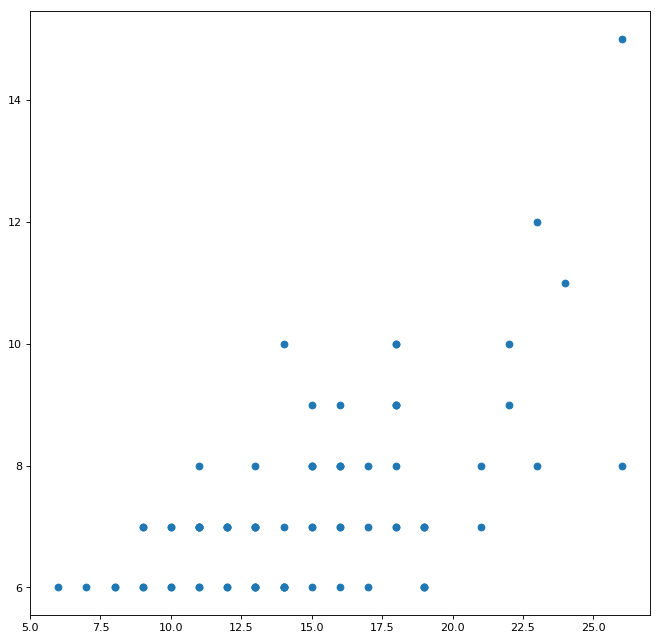

In [112]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(shroudmanykills['kills'], shroudmanykills['headshot_kills'])